# Imports, definitions and compiler path

The GCC optimization flags are listed here: https://gcc.gnu.org/onlinedocs/gcc/Optimize-Options.html

Note that some optimizations made by the compiler do not have an explicit flag, therefore they cannot be individually called. 

In [1]:
import os
import subprocess
import matplotlib.pyplot as plt
import sys
%matplotlib inline

In [15]:
# set environment (gfortran here)
# If you start this notebook from a conda env, sometimes your PATH variable will not include everything that is under your user-defined environment (it may not load your ~/.bashrc). 
# In my case, I ran this notebook in a Mac where GCC was installed via Homebrew. Therefore, I had to do:
# os.environ['PATH'] = os.environ['PATH'] + ':/opt/homebrew/bin'
# for this to work properly. On a shared environment this is less likely to happen, but you may need to do a 'module load gcc'
try:
    comp = subprocess.run(['gcc', '--version'])
    print('gcc is available')
except:
    print('gcc could not be found. Make sure your PATH is set up correctly.')
    sys.exit()

gcc is available


In [12]:
# define compiler name and source file name
compiler = 'gcc'
sourcefile = 'saxpy.c'

In [21]:
def retrieve_time(stdout):
    """
    Retrieves time from subprocesses.run.stdout (specific to this code)
    You may have to adjust this depending on the standard Fortran format output of your machine.
    """
    x = str(stdout)
    x = x.replace("s", "")
    x = x.replace("\n", "")
    x = x.replace("b", "")
    x = x.replace("'", "")
    return float(x[-10:-2])

In [8]:
# list of flags from GCC documentation
o1flags="-fauto-inc-dec -fbranch-count-reg -fcombine-stack-adjustments -fcompare-elim -fcprop-registers -fdce -fdefer-pop -fdelayed-branch -fdse -fforward-propagate -fguess-branch-probability -fif-conversion -fif-conversion2 -finline-functions-called-once -fipa-profile -fipa-pure-const -fipa-reference -fipa-reference-addressable -fmerge-constants -fmove-loop-invariants -fomit-frame-pointer -freorder-blocks -fshrink-wrap -fshrink-wrap-separate -fsplit-wide-types -fssa-backprop -fssa-phiopt -ftree-bit-ccp -ftree-ccp -ftree-ch -ftree-coalesce-vars -ftree-copy-prop -ftree-dce -ftree-dominator-opts -ftree-dse -ftree-forwprop -ftree-fre -ftree-phiprop -ftree-pta -ftree-scev-cprop -ftree-sink -ftree-slsr -ftree-sra -ftree-ter -funit-at-a-time"
o1flags_list = o1flags.split(" ")

o2flags="-falign-functions -falign-jumps -falign-labels -falign-loops -fcaller-saves -fcode-hoisting -fcrossjumping -fcse-follow-jumps -fcse-skip-blocks -fdelete-null-pointer-checks -fdevirtualize -fdevirtualize-speculatively -fexpensive-optimizations -ffinite-loops -fgcse -fgcse-lm -fhoist-adjacent-loads -finline-functions -finline-small-functions -findirect-inlining -fipa-bit-cp -fipa-cp -fipa-icf -fipa-ra -fipa-sra -fipa-vrp -fisolate-erroneous-paths-dereference -flra-remat -foptimize-sibling-calls -foptimize-strlen -fpartial-inlining -fpeephole2 -freorder-blocks-algorithm=stc -freorder-blocks-and-partition -freorder-functions -frerun-cse-after-loop -fschedule-insns -fschedule-insns2 -fsched-interblock -fsched-spec -fstore-merging -fstrict-aliasing -fthread-jumps -ftree-builtin-call-dce -ftree-pre -ftree-switch-conversion -ftree-tail-merge -ftree-vrp"
o2flags_list = o2flags.split(" ")

o3flags="-fgcse-after-reload -fipa-cp-clone -floop-interchange -floop-unroll-and-jam -fpeel-loops -fpredictive-commoning -fsplit-loops -fsplit-paths -ftree-loop-distribution -ftree-loop-vectorize -ftree-partial-pre -ftree-slp-vectorize -funswitch-loops -fvect-cost-model -fvect-cost-model=dynamic -fversion-loops-for-strides"
o3flags_list = o3flags.split(" ")

# Using explicit individual flags

## GCC O1 Flags

In [25]:
t1=[]
for flag in o1flags_list:
        comp = subprocess.run([compiler, flag, sourcefile], capture_output=True)
        if comp.returncode != 0:
            print('Compilation with this flag failed', flag)
            print('Error message: ', comp.stderr)
        else:
            run = subprocess.run(['./a.out'], capture_output=True)
            print(flag, run.stdout)
            t1.append(retrieve_time(run.stdout))
# now combine all flags
cmd = o1flags_list.copy()
cmd.insert(0, compiler)
cmd.append(sourcefile)
comp = subprocess.run(cmd, capture_output=True)
if comp.returncode != 0:
    print('One of the flags failed')
    print(comp.stderr)
else:
    run = subprocess.run(['./a.out'], capture_output=True)
    print('ALL', run.stdout)
    t1.append(retrieve_time(run.stdout))

-fauto-inc-dec b'Time for SAXPY: 0.659806 s\n'
-fbranch-count-reg b'Time for SAXPY: 0.367108 s\n'
-fcombine-stack-adjustments b'Time for SAXPY: 0.356282 s\n'
-fcompare-elim b'Time for SAXPY: 0.358257 s\n'
-fcprop-registers b'Time for SAXPY: 0.355136 s\n'
-fdce b'Time for SAXPY: 0.344373 s\n'
-fdefer-pop b'Time for SAXPY: 0.347982 s\n'
-fdelayed-branch b'Time for SAXPY: 0.357846 s\n'
-fdse b'Time for SAXPY: 0.359509 s\n'
-fforward-propagate b'Time for SAXPY: 0.355294 s\n'
-fguess-branch-probability b'Time for SAXPY: 0.345287 s\n'
-fif-conversion b'Time for SAXPY: 0.346374 s\n'
-fif-conversion2 b'Time for SAXPY: 0.408175 s\n'
-finline-functions-called-once b'Time for SAXPY: 0.342247 s\n'
-fipa-profile b'Time for SAXPY: 0.366292 s\n'
-fipa-pure-const b'Time for SAXPY: 0.358714 s\n'
-fipa-reference b'Time for SAXPY: 0.355044 s\n'
-fipa-reference-addressable b'Time for SAXPY: 0.362541 s\n'
-fmerge-constants b'Time for SAXPY: 0.359726 s\n'
-fmove-loop-invariants b'Time for SAXPY: 0.343185 s\

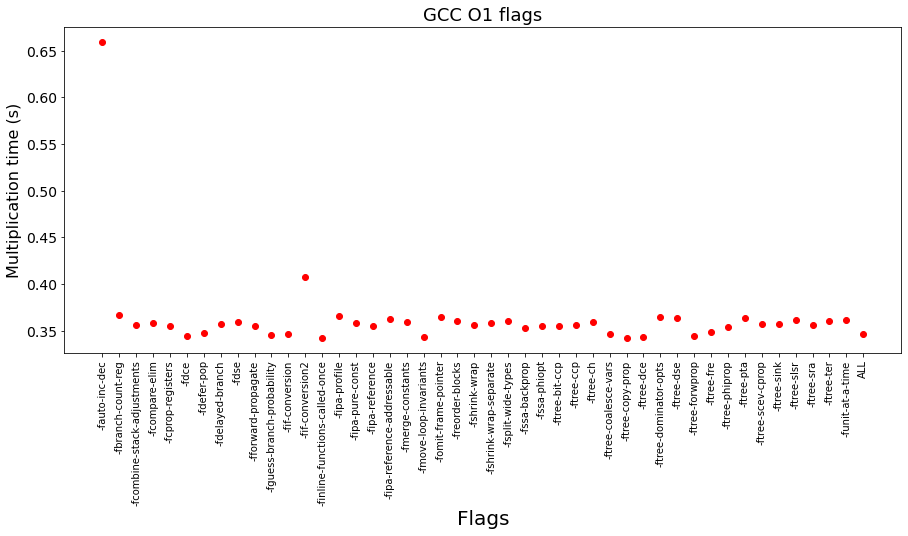

In [26]:
x = o1flags_list.copy()
x.append('ALL')
plt.figure(figsize=(15,6))
plt.scatter(x, t1, color='red', marker='o')
plt.xticks(rotation=90);
plt.xlabel('Flags', fontsize=20)
plt.ylabel('Multiplication time (s)', fontsize=16)
plt.yticks(fontsize=14);
plt.title("GCC O1 flags", fontsize=18);

## GCC O2 Flags

In [27]:
t2=[]
for flag in o2flags_list:
        comp = subprocess.run([compiler, flag, sourcefile], capture_output=True)
        if comp.returncode != 0:
            print('Compilation with this flag failed', flag)
            print('Error message: ', comp.stderr)
        else:
            run = subprocess.run(['./a.out'], capture_output=True)
            print(flag, run.stdout)
            t2.append(retrieve_time(run.stdout))
# now combine all flags
cmd = o2flags_list.copy()
cmd.insert(0, compiler)
cmd.append(sourcefile)
comp = subprocess.run(cmd, capture_output=True)
if comp.returncode != 0:
    print('One of the flags failed')
    print(comp.stderr)
else:
    run = subprocess.run(['./a.out'], capture_output=True)
    print('ALL', run.stdout)
    t2.append(retrieve_time(run.stdout))

-falign-functions b'Time for SAXPY: 0.718544 s\n'
-falign-jumps b'Time for SAXPY: 0.367859 s\n'
-falign-labels b'Time for SAXPY: 0.361243 s\n'
-falign-loops b'Time for SAXPY: 0.362867 s\n'
-fcaller-saves b'Time for SAXPY: 0.362545 s\n'
-fcode-hoisting b'Time for SAXPY: 0.355592 s\n'
-fcrossjumping b'Time for SAXPY: 0.355588 s\n'
-fcse-follow-jumps b'Time for SAXPY: 0.355180 s\n'
-fcse-skip-blocks b'Time for SAXPY: 0.387435 s\n'
-fdelete-null-pointer-checks b'Time for SAXPY: 0.360421 s\n'
-fdevirtualize b'Time for SAXPY: 0.353761 s\n'
-fdevirtualize-speculatively b'Time for SAXPY: 0.360218 s\n'
-fexpensive-optimizations b'Time for SAXPY: 0.359673 s\n'
-ffinite-loops b'Time for SAXPY: 0.351575 s\n'
-fgcse b'Time for SAXPY: 0.353431 s\n'
-fgcse-lm b'Time for SAXPY: 0.349753 s\n'
-fhoist-adjacent-loads b'Time for SAXPY: 0.354534 s\n'
-finline-functions b'Time for SAXPY: 0.349427 s\n'
-finline-small-functions b'Time for SAXPY: 0.355171 s\n'
-findirect-inlining b'Time for SAXPY: 0.357528 s\n

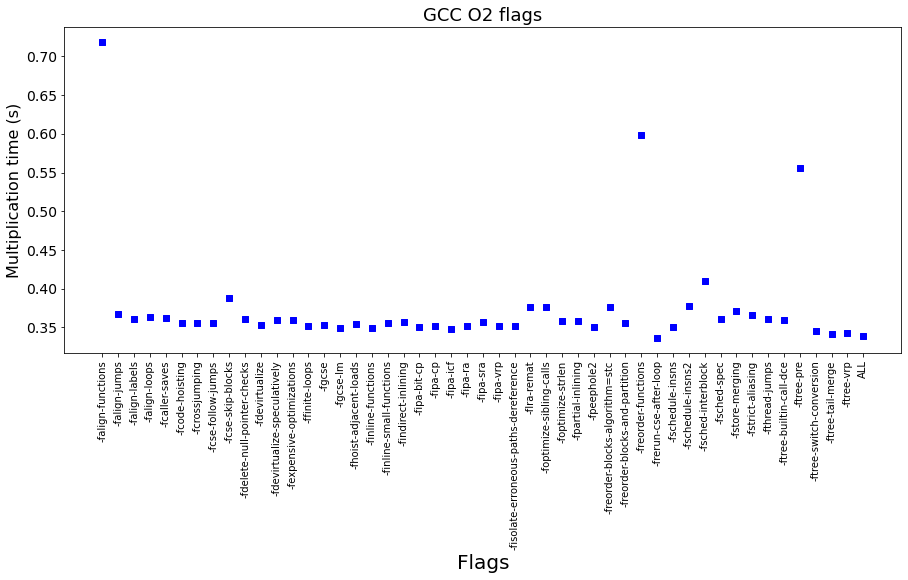

In [28]:
x = o2flags_list.copy()
x.append('ALL')
plt.figure(figsize=(15,6))
plt.scatter(x, t2, color='blue', marker='s')
plt.xticks(rotation=90);
plt.xlabel('Flags', fontsize=20)
plt.ylabel('Multiplication time (s)', fontsize=16)
plt.yticks(fontsize=14);
plt.title("GCC O2 flags", fontsize=18);

## GCC O3 Flags

In [29]:
t3 = []
for flag in o3flags_list:
        comp = subprocess.run([compiler, flag, sourcefile], capture_output=True)
        if comp.returncode != 0:
            print('Compilation with this flag failed', flag)
            print('Error message: ', comp.stderr)
        else:
            run = subprocess.run(['./a.out'], capture_output=True)
            print(flag, run.stdout)
            t3.append(retrieve_time(run.stdout))
# now combine all flags
cmd = o3flags_list.copy()
cmd.insert(0, compiler)
cmd.append(sourcefile)
comp = subprocess.run(cmd, capture_output=True)
if comp.returncode != 0:
    print('One of the flags failed')
    print(comp.stderr)
else:
    run = subprocess.run(['./a.out'], capture_output=True)
    print('ALL', run.stdout)
    t3.append(retrieve_time(run.stdout))

-fgcse-after-reload b'Time for SAXPY: 0.754380 s\n'
-fipa-cp-clone b'Time for SAXPY: 0.395081 s\n'
-floop-interchange b'Time for SAXPY: 0.357181 s\n'
-floop-unroll-and-jam b'Time for SAXPY: 0.359507 s\n'
-fpeel-loops b'Time for SAXPY: 0.359578 s\n'
-fpredictive-commoning b'Time for SAXPY: 0.365220 s\n'
-fsplit-loops b'Time for SAXPY: 0.379300 s\n'
-fsplit-paths b'Time for SAXPY: 0.364084 s\n'
-ftree-loop-distribution b'Time for SAXPY: 0.364130 s\n'
-ftree-loop-vectorize b'Time for SAXPY: 0.516818 s\n'
-ftree-partial-pre b'Time for SAXPY: 0.347281 s\n'
-ftree-slp-vectorize b'Time for SAXPY: 0.365509 s\n'
-funswitch-loops b'Time for SAXPY: 0.369203 s\n'
-fvect-cost-model b'Time for SAXPY: 0.371253 s\n'
-fvect-cost-model=dynamic b'Time for SAXPY: 0.618302 s\n'
-fversion-loops-for-strides b'Time for SAXPY: 0.338243 s\n'
ALL b'Time for SAXPY: 0.413852 s\n'


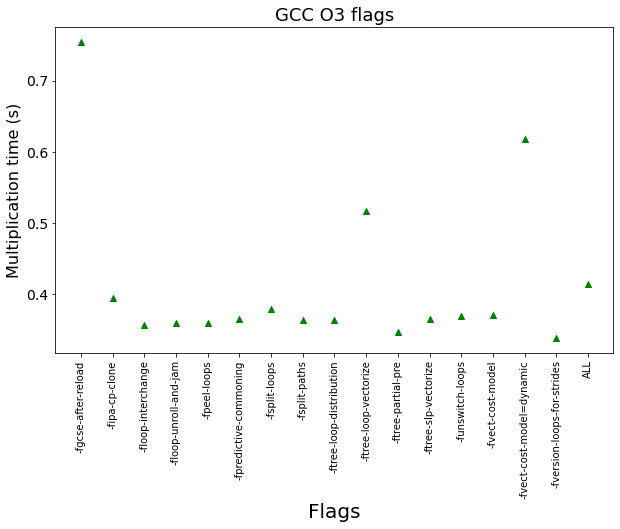

In [30]:
x = o3flags_list.copy()
x.append('ALL')
plt.figure(figsize=(10,6))
plt.scatter(x, t3, color='green', marker='^')
plt.xticks(rotation=90);
plt.xlabel('Flags', fontsize=20)
plt.ylabel('Multiplication time (s)', fontsize=16)
plt.yticks(fontsize=14);
plt.title("GCC O3 flags", fontsize=18);

## All flags combined

### O1 + O2

In [31]:
cmd = o1flags_list.copy()
cmd = cmd + o2flags_list
cmd.insert(0, compiler)
cmd.append(sourcefile)
comp = subprocess.run(cmd, capture_output=True)
if comp.returncode != 0:
    print('One of the flags failed')
    print(comp.stderr)
else:
    run = subprocess.run(['./a.out'], capture_output=True)
    print('O1 + O2', run.stdout)

O1 + O2 b'Time for SAXPY: 0.748338 s\n'


### O1 + O2 + O3

In [32]:
cmd = o1flags_list.copy()
cmd = cmd + o2flags_list + o3flags_list
cmd.insert(0, compiler)
cmd.append(sourcefile)
comp = subprocess.run(cmd, capture_output=True)
if comp.returncode != 0:
    print('One of the flags failed')
    print(comp.stderr)
else:
    run = subprocess.run(['./a.out'], capture_output=True)
    print('O1 + O2 + 03', run.stdout)

O1 + O2 + 03 b'Time for SAXPY: 0.660387 s\n'


# Using combo flags

### No optimization (O0)

In [33]:
cmd = [compiler, '-O0', sourcefile]
comp = subprocess.run(cmd, capture_output=True)
if comp.returncode != 0:
    print('One of the flags failed')
    print(comp.stderr)
else:
    run = subprocess.run(['./a.out'], capture_output=True)
    print('-O0', run.stdout)

-O0 b'Time for SAXPY: 0.719622 s\n'


### Level 1 optimization (O1)

In [34]:
cmd = [compiler, '-O1', sourcefile]
comp = subprocess.run(cmd, capture_output=True)
if comp.returncode != 0:
    print('One of the flags failed')
    print(comp.stderr)
else:
    run = subprocess.run(['./a.out'], capture_output=True)
    print('-O1', run.stdout)

-O1 b'Time for SAXPY: 0.351769 s\n'


### Level 2 optimization (O2)

In [35]:
cmd = [compiler, '-O2', sourcefile]
comp = subprocess.run(cmd, capture_output=True)
if comp.returncode != 0:
    print('One of the flags failed')
    print(comp.stderr)
else:
    run = subprocess.run(['./a.out'], capture_output=True)
    print('-O2', run.stdout)

-O2 b'Time for SAXPY: 0.391288 s\n'


### Level 3 optimization (O3)

In [37]:
cmd = [compiler, '-O3', sourcefile]
comp = subprocess.run(cmd, capture_output=True)
if comp.returncode != 0:
    print('One of the flags failed')
    print(comp.stderr)
else:
    run = subprocess.run(['./a.out'], capture_output=True)
    print('-O3', run.stdout)

-O3 b'Time for SAXPY: 0.328852 s\n'


# Conclusions

- None of the flags listed in the *Optimize Options* of the GNU Compiler documentation changes the execution time of SAXPY significantly.
- Instead of trying individual options, one should always first use the bundled options (-Ox)
- For this simple code, level 2 and 3 optimizations reduce execution time by a good factor
- Compiler optimizations can be obscure. Make sure your code runs without errors before using them (writing a simple test is a good practice)